<a href="https://colab.research.google.com/github/PaulBunkie/veo/blob/main/Comix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Ставим правильную библиотеку (Vertex AI)
!pip install --upgrade google-cloud-aiplatform -q

# Вызываем системное окно авторизации Colab
from google.colab import auth
auth.authenticate_user()

# 2. Импортируем библиотеку, которую требует этот туториал
from google import genai

# 3. Создаем тот самый client, пуская его в обход блокировок ключей (через Vertex AI)
PROJECT_ID = "project-97440ad7-9594-40c4-826"

client = genai.Client(
    vertexai=True,
    project=PROJECT_ID,
    location="us-central1" # Модели Veo обычно лежат в этом регионе
)

print("Client успешно создан! Можно запускать генерацию.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 52.5 MB/s eta 0:00:00
Client успешно создан! Можно запускать генерацию.


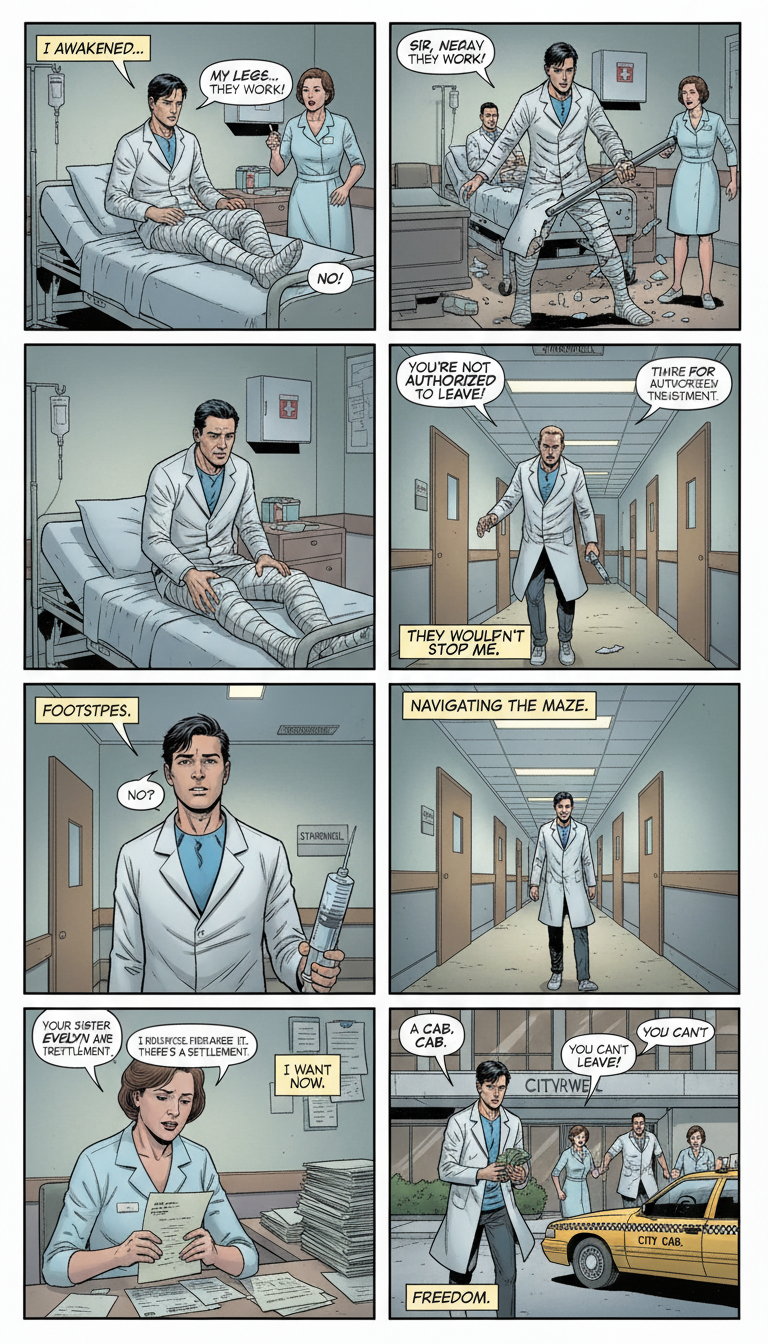

In [4]:
aspect_ratio="9:16"
from google.genai import types

# 2. Импортируем библиотеку, которую требует этот туториал
from google import genai

# 3. Создаем тот самый client, пуская его в обход блокировок ключей (через Vertex AI)
PROJECT_ID = "project-97440ad7-9594-40c4-826"

client = genai.Client(
    vertexai=True,
    project=PROJECT_ID,
    location="global"#"us-central1" ## Модели Veo обычно лежат в этом регионе
)

response = client.models.generate_content(
    model="gemini-2.5-flash-image",
    contents=["""
    Нарисуй иллюстрацию к тексту в виде комикса из нескольких плиток:

(narrator) awakens in a plaster‑casted hospital bed, tests his legs, and struggles to stand before refusing a nurse’s injection; he engages in a sharp, confrontational exchange with the staff, shatters his casts, and seizes a white jacket and metal strut. After hearing footsteps, he hides the broken casts and confronts a doctor‑like orderly, who threatens him with a hypodermic needle. The narrator overpowers the orderly, dons the stolen uniform, and navigates dim hallways, discovering a stairwell and a series of doors. He reaches a desk where a frazzled administrator confirms that his sister Evelyn arranged his admission and reveals a settlement amount. Defiant, (narrator) demands cash, secures a modest payment, and orders a cab, preparing to leave the institution despite the staff’s protests.
    """],
    config=types.GenerateContentConfig(
        response_modalities=["IMAGE"],
        image_config=types.ImageConfig(
            aspect_ratio=aspect_ratio,
        )
    )
)
for part in response.parts:
    if part.inline_data:
        moon_image = part.as_image()
        break
moon_image.show()
moon_image.save('moon_boy.jpg')